In [1]:
import numpy as np
import pandas as pd
import time


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print('normal share =' ,normal_share)
print('fraud share =' ,fraud_share)

normal share = 99.82725143693798
fraud share = 0.1727485630620034


<AxesSubplot:xlabel='Class', ylabel='count'>

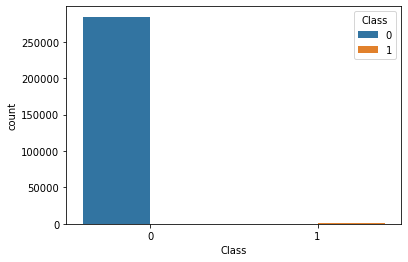

In [6]:
sns.countplot(x=df.Class, hue=df.Class)

<AxesSubplot:xlabel='Amount', ylabel='Density'>

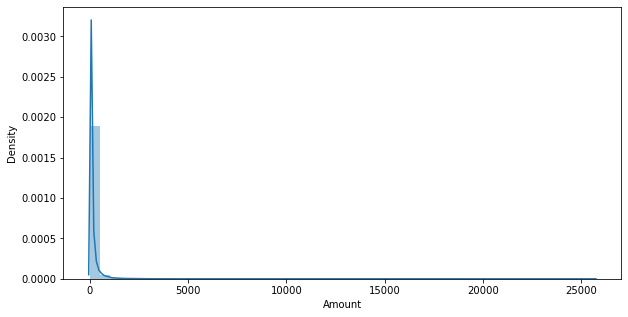

In [7]:
#Checking the distribution of amount
plt.figure(figsize=(10, 5))
sns.distplot(df.Amount)

<AxesSubplot:xlabel='Time', ylabel='Class'>

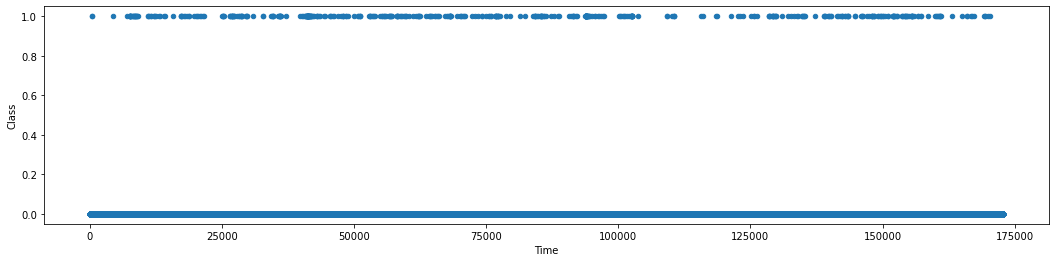

In [8]:
# Create a scatter plot to observe the distribution of classes with time
df.plot.scatter(y='Class', x='Time',figsize=(18,4))

<AxesSubplot:xlabel='Amount', ylabel='Class'>

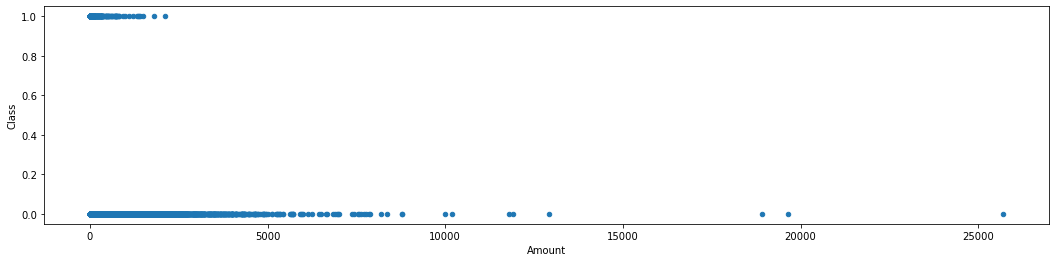

In [9]:
# Create a scatter plot to observe the distribution of classes with Amount
df.plot.scatter(y='Class', x='Amount',figsize=(18,4))

In [3]:
# Drop unnecessary columns
df = df.drop(['Time'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
y= df['Class']
X= df.loc[:, df.columns != 'Class']

In [5]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, train_size = 0.7, test_size = 0.3, 
                                                                    random_state = 42, stratify=y)

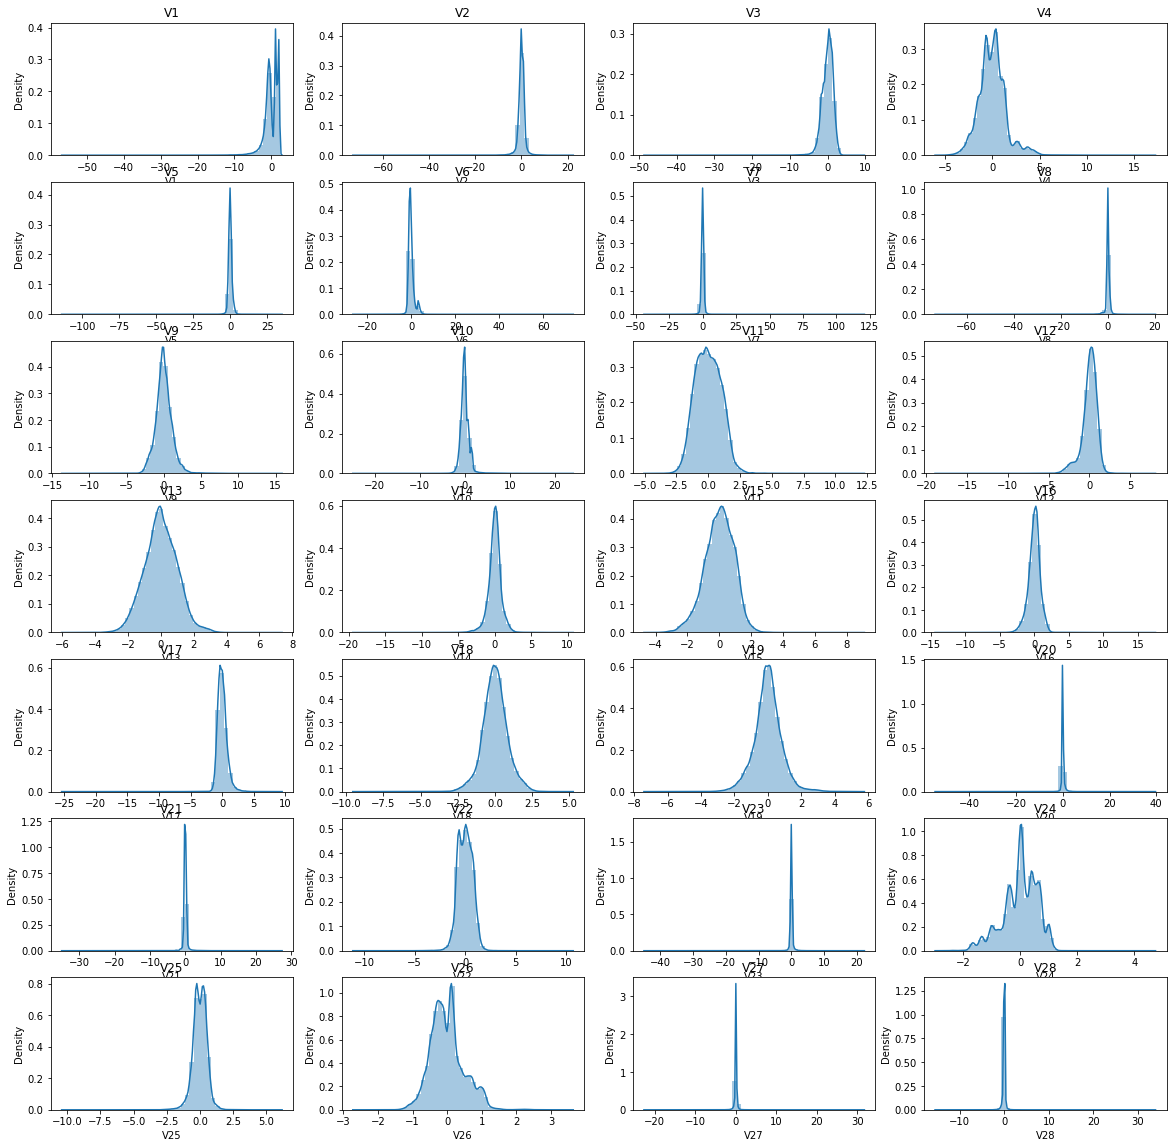

In [13]:
# plot the histogram of a variable from the dataset to see the skewness

k=0
fig, ax = plt.subplots(7, 4, figsize=(20,20))
for i in range(7):
    for j in range(4):
        k=k+1
        sns.distplot(X_train['V'+str(k)], ax=ax[i][j])
        ax[i][j].set_title('V'+str(k))

In [6]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)
pt.fit(X_train)                       

X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

y_train_pt = y_train
y_test_pt = y_test

In [7]:
print(X_train_pt.shape)
print(y_train_pt.shape)

(199364, 29)
(199364,)


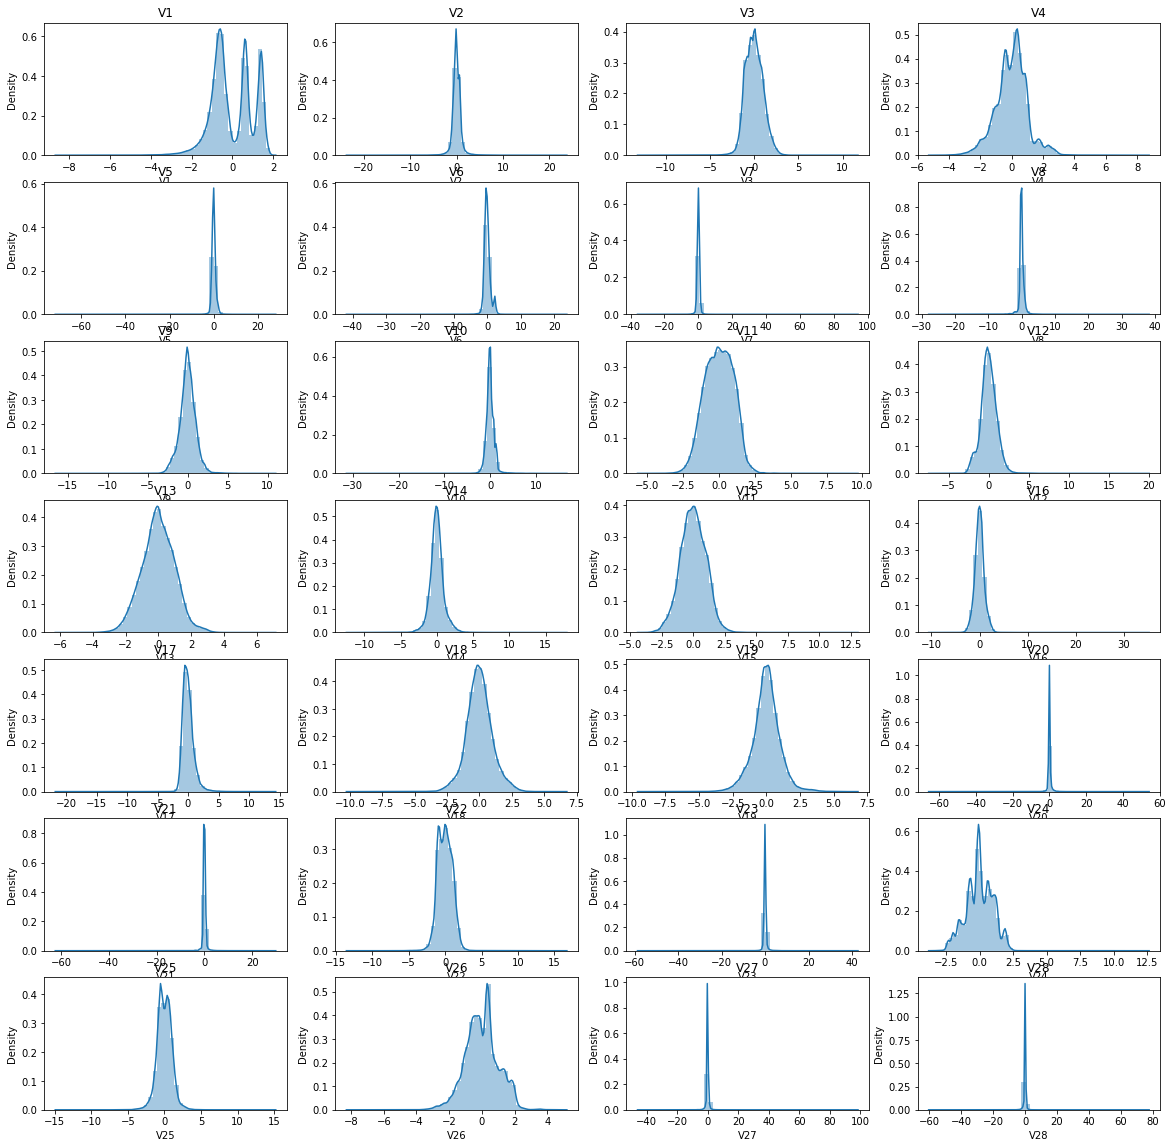

In [16]:
# plot the histogram of a variable from the dataset again to see the result 
X_train_pt_df = pd.DataFrame(X_train_pt,columns=X_train.columns)
k=0
fig, ax = plt.subplots(7, 4, figsize=(20,20))
for i in range(7):
    for j in range(4):
        k=k+1
        sns.distplot(X_train_pt_df['V'+str(k)], ax=ax[i][j])
        ax[i][j].set_title('V'+str(k))

Model building with balanced classes

Perform class balancing with :
1) Random Oversampling

2) SMOTE

In [18]:
!pip install imbalanced-learn

In [8]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

In [9]:
# perfom cross validation on the X_train & y_train 
from sklearn.model_selection import StratifiedKFold

#perform cross validation
skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [22]:
#Logistic Regression with random oversmapling
print("Logistic Regression Classifier: --------------------------")
for c in [0.01, 0.1, 1]:
    print("C=",c, "Penalty= l2")
    cv_score_mean=0
    for train_index, test_index in skf.split(X_train_pt, y_train_pt):
        print("Train:", train_index, "Test:", test_index)
        X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
        y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

        ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
        X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

        logreg_classifier = linear_model.LogisticRegression(penalty='l2',C=c)
        logreg_classifier.fit(X_ros_cv,y_ros_cv)

        y_test_pred= logreg_classifier.predict_proba(X_test_cv)
        cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
        cv_score_mean=cv_score_mean+cv_score
    print("ROC-AUC Score=", cv_score_mean/3)


Logistic Regression Classifier: --------------------------
C= 0.01 Penalty= l2
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9786819703350383
C= 0.1 Penalty= l2
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9777265703395915
C= 1 Penalty= l2
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66

In [25]:
#KNN classifier with random oversampling
print("KNN Classifier: --------------------------")
for n in [3, 5, 7, 9] :
    print("Neighbours =", n)
    cv_score_mean=0
    for train_index, test_index in skf.split(X_train_pt, y_train_pt):
        print("Train:", train_index, "Test:", test_index)
        X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
        y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

        ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
        X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

        knn_classifier= KNeighborsClassifier(n_neighbors = n ,n_jobs=-1)
        knn_classifier.fit(X_ros_cv,y_ros_cv)

        y_test_pred= knn_classifier.predict_proba(X_test_cv)
        cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
        cv_score_mean=cv_score_mean+cv_score
    print("ROC-AUC Score=", cv_score_mean/3)
    

KNN Classifier: --------------------------
Neighbours = 3
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9227791667346964
Neighbours = 5
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9285600872574623
Neighbours = 7
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 13932

In [9]:
#Decision Tree classifier with random oversampling
print("Decision Trees Classifier: --------------------------")
for min_samples_split in [10, 5]:
    for min_samples_leaf in [10, 5]:
        for max_features in ['sqrt','log2',None]:
            print("min_samples_split=",min_samples_split, "min_samples_leaf=",min_samples_leaf,"max_features=",max_features)
            cv_score_mean=0
            for train_index, test_index in skf.split(X_train_pt, y_train_pt):
                print("Train:", train_index, "Test:", test_index)
                X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
                y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

                ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
                X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

                dt_classifier= DecisionTreeClassifier(min_samples_split=min_samples_split,
                                                      min_samples_leaf=min_samples_leaf,
                                                      max_features=max_features)
                dt_classifier.fit(X_ros_cv,y_ros_cv)

                y_test_pred= dt_classifier.predict_proba(X_test_cv)
                cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
                cv_score_mean=cv_score_mean+cv_score
                
            print("ROC-AUC Score=", cv_score_mean/3)

Decision Trees Classifier: --------------------------
min_samples_split= 10 min_samples_leaf= 10 max_features= sqrt
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9024209829537733
min_samples_split= 10 min_samples_leaf= 10 max_features= log2
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.8921955637543874
min_samples_split= 10 min_samples_leaf= 10 max_features= None
Train: [ 66445  66446  66447 ... 199361 199362 199

In [10]:
#Random Forrest classifier with random ovrsampling
print("Random Forest Classifier: --------------------------")
for n_estimators in [100,150,200]:
    for max_features in ['sqrt','log2',None]:
        print("n_estimators=",n_estimators, "max_features=",max_features)
        cv_score_mean=0
        for train_index, test_index in skf.split(X_train_pt, y_train_pt):
            print("Train:", train_index, "Test:", test_index)
            X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
            y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

            ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
            X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

            rf_classifier= RandomForestClassifier(n_estimators=n_estimators,
                                                      min_samples_leaf=10,
                                                      max_features=max_features, n_jobs=-1)
            rf_classifier.fit(X_ros_cv,y_ros_cv)

            y_test_pred= rf_classifier.predict_proba(X_test_cv)
            cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
            cv_score_mean=cv_score_mean+cv_score
        print("ROC-AUC Score=", cv_score_mean/3)

Random Forest Classifier: --------------------------
n_estimators= 100 max_features= sqrt
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9605073205388325
n_estimators= 100 max_features= log2
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9588536236023334
n_estimators= 100 max_features= None
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1  

In [10]:
#XG Boost# classifier with random ovrsampling
print("XGBOOST Classifier: --------------------------")
for n_est in [200, 250, 300] :
    print("Number of estimators =" , n_est)
    for l_rate in [0.1, 0.2, 0.3] :
        print("Learning Rate =" , l_rate)
        cv_score_mean=0
        for train_index, test_index in skf.split(X_train_pt, y_train_pt):
            print("Train:", train_index, "Test:", test_index)
            X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
            y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

            ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
            X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

            xgboost_classifier= XGBClassifier(n_estimators = n_est,
                                    learning_rate = l_rate,
                                    subsample=0.6, n_jobs=-1)
            xgboost_classifier.fit(X_ros_cv,y_ros_cv)

            y_test_pred= xgboost_classifier.predict_proba(X_test_cv)
            cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
            cv_score_mean=cv_score_mean+cv_score
        print("ROC-AUC Score=", cv_score_mean/3)

XGBOOST Classifier: --------------------------
Number of estimators = 200
Learning Rate = 0.1
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9816770570149185
Learning Rate = 0.2
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9814294769772344
Learning Rate = 0.3
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363

#### Cross Validation ROC-AUC Score after Random Oversampling
 1) Logistic Regression (C = 0.01, penelty = l2) = 0.9786819703350383
 
 2) KNN Algorithm (K = 9) = 0.9328727555640487
 
 3) Decision Tree (min_samples_split= 10, min_samples_leaf= 10, max_features= sqrt) = 0.9024209829537733
 
 4) Random Forrest (Number of estimators = 150, max_features = log2) = 0.9698014351175068
 
 5) XG Boost (Number of estimators = 300, learning rate = 0.1) = 0.9821630942035502

In [10]:
#Class distribution after applying SMOTE
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

In [11]:
print(X_train_1.shape)

(344, 29)


In [12]:
print(X_train_0.shape)

(199020, 29)


In [13]:
print(X_train_0.ndim)

2


In [14]:
print(X_train_1.ndim)

2


In [15]:
X_train_1

array([[-2.14051149e+00,  4.10487145e+00, -8.99685940e+00, ...,
         2.35233347e+00,  1.13062484e+00,  7.60000000e-01],
       [-1.30865194e+01,  7.35214834e+00, -1.82565761e+01, ...,
        -2.49830025e+00, -7.11066152e-01,  3.03100000e+01],
       [-2.92194438e+00, -2.28062381e-01, -5.87728865e+00, ...,
         7.26781012e-01,  2.34513922e-01,  7.23210000e+02],
       ...,
       [ 1.89403629e+00,  1.90580604e+00, -3.51573008e+00, ...,
        -1.37115779e-02,  4.80836587e-02,  2.22000000e+00],
       [-2.64577447e+01,  1.64974719e+01, -3.01773175e+01, ...,
        -7.26348215e+00, -1.32488431e+00,  1.00000000e+00],
       [ 1.87823003e+00,  1.32562957e+00, -2.33346899e+00, ...,
        -2.66665674e-02,  5.23766738e-03,  7.06000000e+00]])

In [16]:
X_train_smote_1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
199364,-5.686709,-1.701421,-3.133499,4.941211,-3.086380,0.341787,-1.435612,0.953999,-2.398132,-3.638455,...,-0.059959,0.503287,0.025303,-1.110368,0.129743,-0.471542,-0.003962,1.009476,-0.742883,725.759195
199365,-3.283249,3.678737,-4.725635,5.925680,-3.175142,-1.338882,-6.303720,2.279452,-4.232108,-5.942067,...,0.603808,1.249083,0.103741,-0.109943,-0.064649,-0.899321,-0.093943,0.845156,0.268967,3.058474
199366,1.088725,0.910974,-0.334421,2.785392,0.329530,-0.418272,-0.006945,0.205856,-0.682145,-0.214935,...,-0.246681,-0.052132,-0.218189,-0.041692,-0.052520,0.374010,0.068493,0.015361,0.061636,0.254332
199367,0.311664,1.327351,-1.889896,2.941550,-1.407363,-1.038671,-2.488374,0.672154,-1.278309,-3.028328,...,0.239895,0.483045,0.020422,-0.181481,0.134574,0.722281,-0.101412,0.576607,0.297452,6.725155
199368,-6.872095,2.928921,-8.469091,5.004449,-4.637823,-1.044531,-7.432221,0.785125,-3.586598,-8.076255,...,-0.085690,-0.179461,0.626933,0.739189,-0.513849,0.185227,-0.051003,1.059519,0.079160,130.161225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398035,-3.357996,-2.568049,-0.365056,4.672955,3.961444,0.710127,-0.856349,-0.392437,-0.678445,2.481922,...,-1.635408,-0.403849,1.391736,0.008298,-0.833613,-0.182207,0.532670,-0.279537,0.604512,21.602821
398036,-5.062166,3.782403,-7.248662,5.766324,-1.561306,-1.924248,-4.105541,0.392855,-1.598825,-3.120678,...,-0.357296,1.110496,0.506733,0.315906,0.071434,-0.555715,0.435523,-2.324803,0.941664,0.527436
398037,1.145964,3.168997,-6.120982,5.543081,1.725571,-1.836101,-0.912762,0.269205,-3.183577,-3.920035,...,0.335340,0.134736,-0.802532,-0.099875,0.005459,0.431753,0.081630,0.488082,0.329777,0.028921
398038,-27.662874,15.558020,-28.806548,6.399738,-20.350419,-4.741264,-19.007176,18.221464,-3.692461,-8.052773,...,1.705016,1.800190,-2.020544,-1.058392,0.153727,2.034654,-0.206579,1.320713,0.383768,99.990000


In [21]:
#Logistic Regression with SMOTE
print("Logistic Regression Classifier: --------------------------")
for c in [0.01, 0.1, 1]:
    print("C=",c, "Penalty= l2")
    cv_score_mean=0
    for train_index, test_index in skf.split(X_train_pt, y_train_pt):
        print("Train:", train_index, "Test:", test_index)
        X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
        y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

        ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
        X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

        logreg_classifier = linear_model.LogisticRegression(penalty='l2',C = c)
        logreg_classifier.fit(X_ros_cv,y_ros_cv)

        y_test_pred= logreg_classifier.predict_proba(X_test_cv)
        cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
        cv_score_mean=cv_score_mean+cv_score
    print("ROC-AUC Score=", cv_score_mean/3)

Logistic Regression Classifier: --------------------------
C= 0.01 Penalty= l2
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9767161835173893
C= 0.1 Penalty= l2
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9754437429905392
C= 1 Penalty= l2
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66

In [22]:
#KNN classifier with SMOTE
print("KNN Classifier: --------------------------")
for n in [3, 5, 7, 9, 11] :
    print("Neighbours =", n)
    cv_score_mean=0
    for train_index, test_index in skf.split(X_train_pt, y_train_pt):
        print("Train:", train_index, "Test:", test_index)
        X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
        y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

        ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
        X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

        knn_classifier= KNeighborsClassifier(n_neighbors = n ,n_jobs=-1)
        knn_classifier.fit(X_ros_cv,y_ros_cv)

        y_test_pred= knn_classifier.predict_proba(X_test_cv)
        cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
        cv_score_mean=cv_score_mean+cv_score
    print("ROC-AUC Score=", cv_score_mean/3)

KNN Classifier: --------------------------
Neighbours = 3
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9341707877371047
Neighbours = 5
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9413746856162702
Neighbours = 7
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 13932

In [23]:
#Decision Trees classifier with SMOTE
print("Decision Trees Classifier: --------------------------")
for min_samples_split in [10, 5, 2]:
    for min_samples_leaf in [10, 5, 1]:
        for max_features in ['auto','sqrt','log2',None]:
            print("min_samples_split=",min_samples_split, "min_samples_leaf=",min_samples_leaf,"max_features=",max_features)
            cv_score_mean=0
            for train_index, test_index in skf.split(X_train_pt, y_train_pt):
                print("Train:", train_index, "Test:", test_index)
                X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
                y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

                ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
                X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

                dt_classifier= DecisionTreeClassifier(min_samples_split=min_samples_split,
                                                      min_samples_leaf=min_samples_leaf,
                                                      max_features=max_features)
                dt_classifier.fit(X_ros_cv,y_ros_cv)

                y_test_pred= dt_classifier.predict_proba(X_test_cv)
                cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
                cv_score_mean=cv_score_mean+cv_score
                
            print("ROC-AUC Score=", cv_score_mean/3)

Decision Trees Classifier: --------------------------
min_samples_split= 10 min_samples_leaf= 10 max_features= auto
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.8981187504124905
min_samples_split= 10 min_samples_leaf= 10 max_features= sqrt
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9244595717720108
min_samples_split= 10 min_samples_leaf= 10 max_features= log2
Train: [ 66445  66446  66447 ... 199361 199362 199

Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9087321653754042
min_samples_split= 5 min_samples_leaf= 1 max_features= auto
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.8740854385573981
min_samples_split= 5 min_samples_leaf= 1 max_features= sqrt
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.8800254852898194
min_samples_split= 5 min_sa

In [16]:
#Random Forrest with SMOTE
print("Random Forest Classifier: --------------------------")
for n_estimators in [100,150,200]:
    for max_features in ['sqrt','log2',None]:
        print("n_estimators=",n_estimators, "max_features=",max_features)
        cv_score_mean=0
        for train_index, test_index in skf.split(X_train_pt, y_train_pt):
            print("Train:", train_index, "Test:", test_index)
            X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
            y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

            ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
            X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

            rf_classifier= RandomForestClassifier(n_estimators=n_estimators,
                                                      min_samples_leaf=10,
                                                      max_features=max_features, n_jobs=-1)
            rf_classifier.fit(X_ros_cv,y_ros_cv)

            y_test_pred= rf_classifier.predict_proba(X_test_cv)
            cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
            cv_score_mean=cv_score_mean+cv_score
        print("ROC-AUC Score=", cv_score_mean/3)

Random Forest Classifier: --------------------------
n_estimators= 100 max_features= sqrt
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9778975653470886
n_estimators= 100 max_features= log2
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9767944284737395
n_estimators= 100 max_features= None
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1  

In [19]:
#XG Boost with SMOTE
print("XGBOOST Classifier: --------------------------")
for l_rate in [0.1, 0.2, 0.3] :
    for n_est in [200, 250, 300] :
        print("learning_rate=",l_rate, "Number of estimators=",n_est)
        cv_score_mean=0
        for train_index, test_index in skf.split(X_train_pt, y_train_pt):
            print("Train:", train_index, "Test:", test_index)
            X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
            y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

            ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
            X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

            xgboost_classifier= XGBClassifier(n_estimators=n_est,
                                            learning_rate=l_rate,
                                            subsample=0.6, n_jobs=-1)
            xgboost_classifier.fit(X_ros_cv,y_ros_cv)

            y_test_pred= xgboost_classifier.predict_proba(X_test_cv)
            cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
            cv_score_mean=cv_score_mean+cv_score
        print("ROC-AUC Score=", cv_score_mean/3)

XGBOOST Classifier: --------------------------
learning_rate= 0.1 Number of estimators= 200
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9784162069962802
learning_rate= 0.1 Number of estimators= 250
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9786914136323669
learning_rate= 0.1 Number of estimators= 300
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train

#### Cross Validation ROC-AUC Score after SMOTE
1) Logistic Regression (C = 0.01, penelty = l2) = 0.9767161835173893

2) KNN Algorithm (K = 11) = 0.9455900809466002

3) Decision Tree (min_samples_split= 10, min_samples_leaf= 5, max_features= log2) = 0.9246868066952936

4) Random Forrest (Number of estimators = 200, max features = log2) = 0.9848303303272227

5) XG Boost (Number of estimators = 300, learning rate = 0.1) = 0.9789042030587561

#### Best models under random oversampling
1) XG Boost (Number of estimators = 300, learning rate = 0.1) = 0.9821630942035502 

2) Logistic Regression (C = 0.01, penelty = l2) = 0.9786819703350383 

#### Best models under SMOTE
1) Random Forrest (Number of estimators = 200, max features = log2) = 0.9848303303272227

2) XG Boost (Number of estimators = 300, learning rate = 0.1) = 0.9789042030587561

#### Using the best models to predict on test dataset

In [9]:
#Logistic Regression with Random Oversampling

#Initialise the model with optimum hyperparameters
clf = linear_model.LogisticRegression(penalty='l2',C=0.01)
#oversampling method 
ros = over_sampling.RandomOverSampler(sampling_strategy='minority', random_state=42)
X_ros,y_ros = ros.fit_resample(X_train,y_train) 
clf.fit(X_ros,y_ros)
#predict on test to give probability
y_pred= clf.predict_proba(X_test)
#calculate the ROC-AUC
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("LogisticRegression ROC-AUC Score =", score)

LogisticRegression ROC-AUC Score = 0.9697648304849782


In [10]:
# XG boost with Random Oversampling
clf = XGBClassifier(n_estimators=300,learning_rate=0.1,subsample=0.6, n_jobs=-1) 
ros = over_sampling.RandomOverSampler(sampling_strategy='minority', random_state=42)
X_ros,y_ros = ros.fit_resample(X_train,y_train) 
clf.fit(X_ros,y_ros)
y_pred= clf.predict_proba(X_test.values)
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("XGBOOST Classifier ROC-AUC Score =", score)

XGBOOST Classifier ROC-AUC Score = 0.9707978906275992


In [11]:
#Random Forrest with SMOTE
clf = RandomForestClassifier(n_estimators=200, min_samples_leaf=10, max_features='log2')  
ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
X_ros,y_ros = ros.fit_resample(X_train,y_train) 
clf.fit(X_ros,y_ros)
y_pred= clf.predict_proba(X_test)
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("Random Forest Classifier ROC-AUC Score =", score)

Random Forest Classifier ROC-AUC Score = 0.9774340009157407


In [11]:
#XG Boost with SMOTE
clf = XGBClassifier(n_estimators=300,learning_rate=0.1,subsample=0.6, n_jobs=-1) 
ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
X_ros,y_ros = ros.fit_resample(X_train,y_train) 
clf.fit(X_ros,y_ros)
y_pred= clf.predict_proba(X_test.values)
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("XGBOOST Classifier ROC-AUC Score =", score)

XGBOOST Classifier ROC-AUC Score = 0.9794743758941543


XG Boost with SMOTE is the best model

In [13]:
#Print the important features of the best model to understand the dataset
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)


Top var = 14
2nd Top var = 4
3rd Top var = 10


In [12]:
# To choose the best threshold
y_train_pred= clf.predict_proba(X_train.values)
y_df = pd.DataFrame({'actual_label':y_train, 'predicted_prob':y_train_pred[:,1]})
y_df['predicted_prob'] = y_df['predicted_prob'].apply(lambda x: '{:.6f}'.format(x))
y_df.head()

,actual_label,predicted_prob
249927,0,0.000001
214082,0,0.000013
106005,0,0.000002
58619,0,0.000000
191638,0,0.000002


In [13]:
# find the best threshold on roc_curve to know the range for search
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

0.9108143


In [20]:
# Let's create columns with different probability cutoffs 
thresholds = [0.9,0.91,0.9105,0.911,0.89,0.88,0.915,0.92]
for i in thresholds:
    y_df[i]= y_df.predicted_prob.map(lambda x: 1 if float(x) > i else 0)
y_df.head()

,actual_label,predicted_prob,0.9,0.91,0.9105,0.911,0.89,0.88,0.915,0.92
249927,0,0.000001,0,0,0,0,0,0,0,0
214082,0,0.000013,0,0,0,0,0,0,0,0
106005,0,0.000002,0,0,0,0,0,0,0,0
58619,0,0.000000,0,0,0,0,0,0,0,0
191638,0,0.000002,0,0,0,0,0,0,0,0


In [21]:
# calculate Precision and Recall  for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','precision','recall'])
from sklearn.metrics import confusion_matrix

thresholds = [0.9,0.91,0.9105,0.911,0.89,0.88,0.915,0.92]
for i in thresholds:
    cm = metrics.confusion_matrix(y_df.actual_label, y_df[i])
    total=sum(sum(cm))
    precision = cm[1,1]/(cm[1,1]+cm[0,1])
    recall =  cm[1,1]/(cm[1,1]+cm[1,0])

    cutoff_df.loc[i] =[ i ,precision,recall]
print(cutoff_df)

          prob  precision    recall
0.9000  0.9000        1.0  1.000000
0.9100  0.9100        1.0  1.000000
0.9105  0.9105        1.0  1.000000
0.9110  0.9110        1.0  0.997093
0.8900  0.8900        1.0  1.000000
0.8800  0.8800        1.0  1.000000
0.9150  0.9150        1.0  0.997093
0.9200  0.9200        1.0  0.997093


In [22]:
# f1 = (2*precision*recall)/(precision+recall)
cutoff_df['f1'] = (2*cutoff_df['precision']*cutoff_df['recall'])/(cutoff_df['precision'] + cutoff_df['recall'])
print(cutoff_df)

          prob  precision    recall        f1
0.9000  0.9000        1.0  1.000000  1.000000
0.9100  0.9100        1.0  1.000000  1.000000
0.9105  0.9105        1.0  1.000000  1.000000
0.9110  0.9110        1.0  0.997093  0.998544
0.8900  0.8900        1.0  1.000000  1.000000
0.8800  0.8800        1.0  1.000000  1.000000
0.9150  0.9150        1.0  0.997093  0.998544
0.9200  0.9200        1.0  0.997093  0.998544


5 different thresholds give a f1 score of 1. We will chose 0.911 as it is the closest to 0.9108 which had the highest auc

In [23]:
y_test_pred= clf.predict_proba(X_test.values)
y_df = pd.DataFrame({'actual_label':y_test, 'predicted_prob':y_test_pred[:,1]})
y_df['predicted_prob'] = y_df['predicted_prob'].apply(lambda x: '{:.6f}'.format(x))
y_df['predicted_label']= y_df.predicted_prob.map(lambda x: 1 if float(x) > 0.911 else 0)
y_df.head()

,actual_label,predicted_prob,predicted_label
186882,0,0.000002,0
165754,0,0.000003,0
235285,0,0.000010,0
101271,0,0.000006,0
5832,0,0.000096,0


In [24]:
cm = metrics.confusion_matrix(y_df.actual_label, y_df.predicted_label)
precision = cm[1,1]/(cm[1,1]+cm[0,1])
recall =  cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*precision*recall)/(precision+recall)

print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

Precision: 0.8823529411764706
Recall: 0.8108108108108109
F1 Score: 0.8450704225352113


We will use this threshold as High Precision is good in predicting **Actual positives as True Positives**